In [ ]:
import pandas as pd
df = pd.read_csv('movies_data.csv')

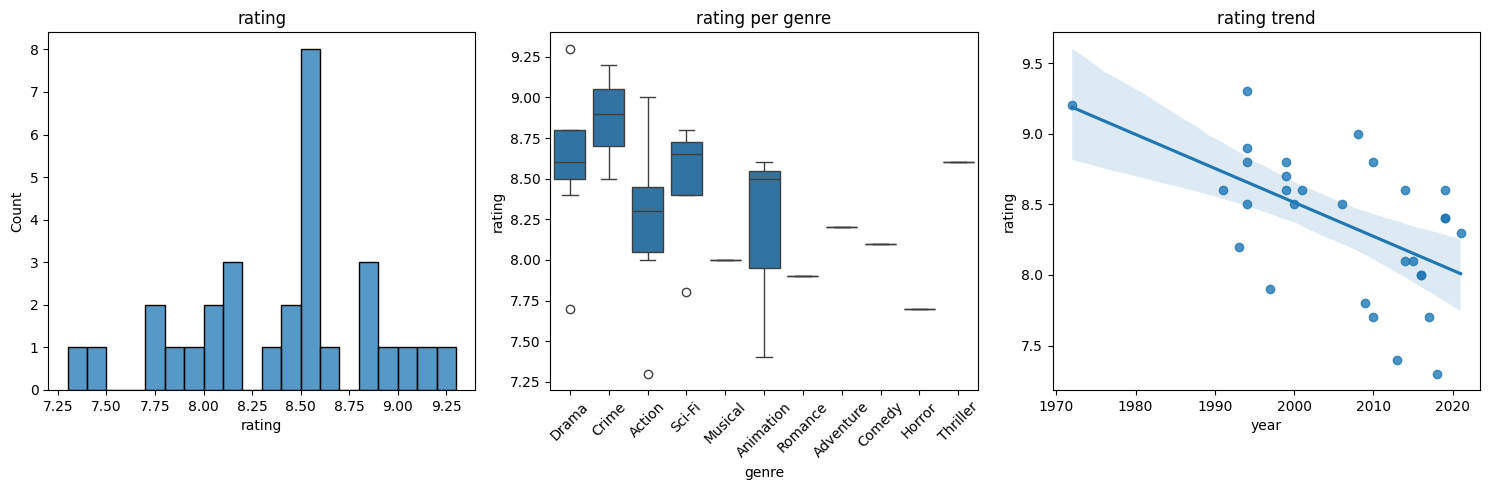

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_ratings(df):
    """평점 데이터 시각화"""
    plt.figure(figsize=(15, 5))

    # 평점 분포 히스토그램
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='rating', bins=20)
    plt.title('rating')

    # 장르별 평균 평점
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='genre', y='rating')
    plt.xticks(rotation=45)
    plt.title('rating per genre')

    # 연도별 평균 평점 트렌드
    plt.subplot(1, 3, 3)
    sns.regplot(data=df, x='year', y='rating')
    plt.title('rating trend')

    plt.tight_layout()
    plt.show()

visualize_ratings(df)

In [ ]:
def analyze_ratings(df):
    """영화 평점 데이터 분석"""
    res = {}  # 결과를 저장할 딕셔너리

    # 기본 통계 요약
    res['기본 통계'] = df['rating'].describe()

    # 평점 구간별 분포
    bins = [0, 4, 6, 8, 10]
    labels = ['낮음', '미흡', '보통', '우수']
    df['평점 구간'] = pd.cut(df['rating'], bins=bins, labels=labels)
    res['평점 분포'] = df['평점 구간'].value_counts()

    # 장르별 평균 평점
    genre_ratings = df.groupby('genre')['rating'].agg(['mean', 'count', 'std']).round(2)
    res['장르별 통계'] = genre_ratings

    # 연도별 평균 평점 트렌드
    res['연도별 평균'] = df.groupby('year')['rating'].mean()

    return res


In [ ]:
def analyze_financial(df):
    """재무 관련 분석"""

    # 수익성 계산
    df['profit'] = df['revenue'] - df['budget']
    df['roi'] = (df['profit'] / df['budget'] * 100).round(2)

    # 수익성 상위 5편
    print("\n1. 수익성 상위 5편:")
    top_profitable = df.nlargest(5, 'profit')[['title', 'year', 'profit', 'roi']]
    print(top_profitable)

    # 장르별 평균 수익
    print("\n2. 장르별 평균 수익(백만 달러):")
    genre_profits = df.groupby('genre')['profit'].mean().sort_values(ascending=False)
    print(genre_profits)


analyze_financial(df)


1. 수익성 상위 5편:
                      title  year  profit      roi
13                   Avatar  2009  2610.0  1101.27
9         Avengers: Endgame  2019  2442.0   685.96
12                  Titanic  1997  2002.0  1001.00
17  Spider-Man: No Way Home  2021  1702.0   851.00
18            Black Panther  2018  1147.0   573.50

2. 장르별 평균 수익(백만 달러):
genre
Romance      2002.000000
Action       1059.571429
Sci-Fi       1056.000000
Adventure     851.000000
Animation     809.666667
Musical       416.000000
Drama         338.857143
Thriller      253.000000
Horror        250.500000
Crime         215.333333
Comedy        148.000000
Name: profit, dtype: float64


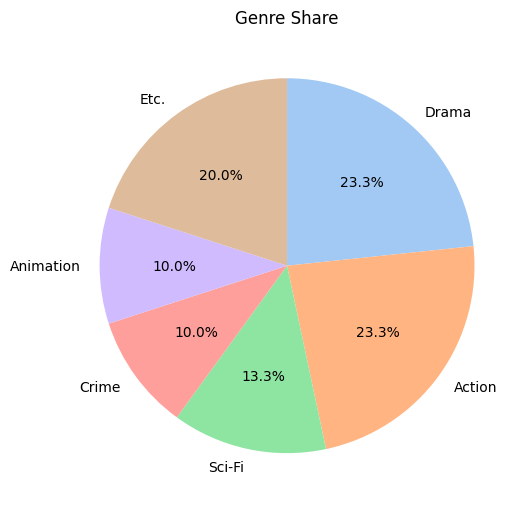

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('movies_data.csv')

# 장르별 영화 수 계산
genre_counts = df['genre'].value_counts()

# 상위 5개 장르 추출 및 'Etc.'로 통합
top_genres = genre_counts[:5]
etc_count = pd.Series({'Etc.': genre_counts[5:].sum()})
genre_distribution = pd.concat([top_genres, etc_count])

# 색상 팔레트
colors = sns.color_palette('pastel', len(genre_distribution))

# 시각화 레이아웃 설정
plt.figure(figsize=(20, 5))

# 파이 차트 그리기
plt.subplot(141)
plt.pie(
    genre_distribution,
    labels=genre_distribution.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    counterclock=False
)
plt.title('Genre Share')

plt.tight_layout()
plt.show()


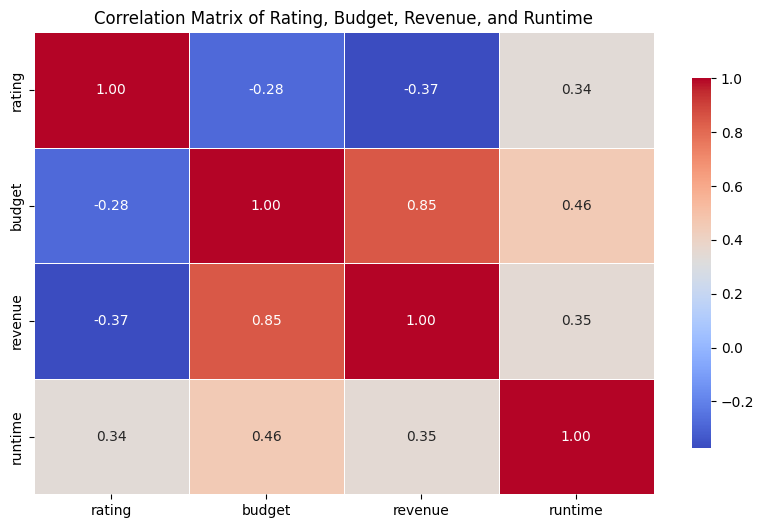

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('movies_data.csv')

# 분석에 필요한 열 추출
columns_of_interest = ['rating', 'budget', 'revenue', 'runtime']
df_subset = df[columns_of_interest]

# 상관계수 계산
correlation_matrix = df_subset.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,                # 상관계수 값 표시
    fmt='.2f',                 # 소수점 두 자리까지 표시
    cmap='coolwarm',           # 색상 팔레트
    linewidths=0.5,            # 셀 간 경계선
    cbar_kws={"shrink": 0.8}   # 컬러바 크기 조정
)
plt.title('Correlation Matrix of Rating, Budget, Revenue, and Runtime')
plt.show()


구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


파일 목록으로 처리하는 방식.

find 명령오를 사용해 라벨링 데이터 .json 파일의 경로를 수집하여

텍스트 파일로 생성해 구글 드라이브의 dataset 폴더에 저장하여 사용.
(구글 드라이브의 I/O 오류가 자주 발생하여 미리 텍스트 파일을 업로드 함.)

json 파일을 시스템 메모리에 로드하여 처리한다.

2-1

In [ ]:
import os
import json
import pandas as pd

In [ ]:
def get_image_ids(image_dirs):
    image_ids = set()
    for image_dir in image_dirs:
        image_files = os.listdir(image_dir)
        image_ids.update(f.split('_')[1] for f in image_files if f.endswith('.jpg'))
    return image_ids

def collect_label_info_with_respondent(file_list_path, image_ids, dataset_name, image_dir):
    label_info = []
    total_files = 0
    processed_files = 0

    # 파일 목록을 읽음
    with open(file_list_path, 'r') as f:
        all_files = f.read().splitlines()

    total_files = len(all_files)
    print(f"Total files listed in {file_list_path}: {total_files}")

    # 이미지 ID가 유효한 파일만 필터링하고 JSON 데이터를 메모리에 로드
    valid_data = []
    for file_path in all_files:
        file = os.path.basename(file_path)
        parts = file.split('_')
        if len(parts) < 2:
            continue
        image_id = parts[1]
        if image_id in image_ids:
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                valid_data.append((file_path, data))
                processed_files += 1
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
                continue

    print(f"Valid files processed: {processed_files}")

    # 메모리에 로드된 데이터를 사용하여 필요한 정보 추출
    for file_path, data in valid_data:
        file = os.path.basename(file_path)
        parts = file.split('_')
        gender_code = parts[0]
        style = parts[3]
        gender = '여성' if gender_code == 'W' else '남성'
        image_file_name = os.path.join(image_dir, file.replace('.json', '.jpg'))

        respondent_id_raw = data.get('user', {}).get('R_id', None)
        style_preference_raw = data.get('item', {}).get('survey', {}).get('Q5', None)
        if respondent_id_raw is not None:
            respondent_id = str(respondent_id_raw)
        else:
            continue
        if style_preference_raw is not None:
            style_preference = int(style_preference_raw)
        else:
            continue
        label_info.append({
            "respondent_id": respondent_id,
            "dataset": dataset_name,
            "gender": gender,
            "style": style,
            "style_preference": style_preference,
            "image_file_name": image_file_name
        })

    return pd.DataFrame(label_info)

# 이미지 디렉토리 설정
train_image_dir = '/content/drive/MyDrive/dataset/training_image'
val_image_dir = '/content/drive/MyDrive/dataset/validation_image'

# 유효한 이미지ID 수집
train_image_ids = get_image_ids([train_image_dir])
val_image_ids = get_image_ids([val_image_dir])

# 파일 목록 경로 설정
train_file_list_path = '/content/drive/MyDrive/dataset/training_label_file_list.txt'
val_file_list_path = '/content/drive/MyDrive/dataset/validation_label_file_list.txt'

# 라벨링 데이터 정보 수집 (응답자ID 포함)
train_label_info_with_resp = collect_label_info_with_respondent(
    train_file_list_path, train_image_ids, 'train', train_image_dir)
val_label_info_with_resp = collect_label_info_with_respondent(
    val_file_list_path, val_image_ids, 'valid', val_image_dir)

Total files listed in /content/drive/MyDrive/dataset/training_label_file_list.txt: 211345
Error reading file /content/drive/MyDrive/dataset/training_label/W_55529_10_sportivecasual_W_137961.json: [Errno 5] Input/output error: '/content/drive/MyDrive/dataset/training_label/W_55529_10_sportivecasual_W_137961.json'
Error reading file /content/drive/MyDrive/dataset/training_label/T_06213_19_normcore_W_222093.json: [Errno 5] Input/output error: '/content/drive/MyDrive/dataset/training_label/T_06213_19_normcore_W_222093.json'
Error reading file /content/drive/MyDrive/dataset/training_label/T_13803_19_normcore_W_209157.json: [Errno 5] Input/output error: '/content/drive/MyDrive/dataset/training_label/T_13803_19_normcore_W_209157.json'
Error reading file /content/drive/MyDrive/dataset/training_label/T_05324_19_lounge_W_010851.json: [Errno 5] Input/output error: '/content/drive/MyDrive/dataset/training_label/T_05324_19_lounge_W_010851.json'
Error reading file /content/drive/MyDrive/dataset/trai

In [ ]:
print(train_label_info_with_resp)
print(val_label_info_with_resp)

2-2

In [ ]:
# Training과 Validation 데이터를 합침
combined_label_info_with_resp = pd.concat(
    [train_label_info_with_resp, val_label_info_with_resp], ignore_index=True)

# 데이터 타입 및 값 확인
print(combined_label_info_with_resp.dtypes)
print("Unique values of 'style_preference':", combined_label_info_with_resp['style_preference'].unique())

# 응답자ID별 라벨링 데이터 수 계산
respondent_counts = combined_label_info_with_resp.groupby('respondent_id').size().reset_index(name='라벨링 데이터 수')
respondent_counts = respondent_counts.sort_values(by='라벨링 데이터 수', ascending=False)

# 상위 100명의 응답자ID 선택
top_100_respondent_ids = respondent_counts['respondent_id'].head(100).tolist()

# 상위 100명의 응답자의 데이터 필터링
top_100_data = combined_label_info_with_resp[
    combined_label_info_with_resp['respondent_id'].isin(top_100_respondent_ids)]

# 결과를 저장할 리스트 초기화
result_rows = []

for respondent_id in top_100_respondent_ids:
    row = {'respondent_id': respondent_id}
    respondent_data = top_100_data[top_100_data['respondent_id'] == respondent_id]
    for dataset in ['train', 'valid']:
        dataset_data = respondent_data[respondent_data['dataset'] == dataset]
        for preference, preference_name in [(2, '스타일선호'), (1, '스타일비선호')]:
            pref_data = dataset_data[dataset_data['style_preference'] == preference]
            image_files = pref_data['image_file_name'].tolist()
            key = f"{dataset}_{preference_name}"
            row[key] = image_files
    result_rows.append(row)

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result_rows)

# 결과 출력
print("상위 100명 응답자의 스타일 선호 정보표:")
print(result_df)